In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
from scipy.integrate import trapz, dblquad
from pyapep.simsep import column

## Start isotherm fitting and getting heat of adsorptions

In [4]:
df0 = pd.read_csv("./low_CO_273K.csv")
df1 = pd.read_csv("./low_CO_298K.csv")
df2 = pd.read_csv("./low_CO_323K.csv")
df3 = pd.read_csv("./low_CO2_273K.csv")
df4 = pd.read_csv("./low_CO2_298K.csv")
df5 = pd.read_csv("./low_CO2_323K.csv")
df6 = pd.read_csv("./low_CO2_298K_high_pressure.csv")

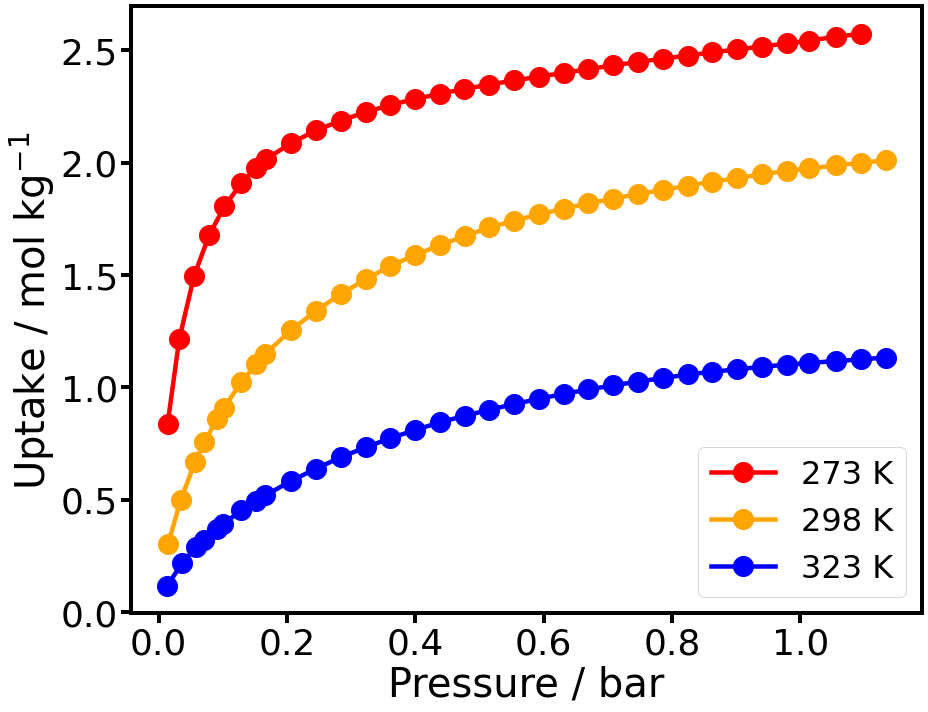

In [5]:
fig=plt. figure(figsize =(13,10)) 
ax0=fig.add_subplot(1,1,1)

plt.plot(df0["P"], df0["q"], lw=4.5, marker='o', markersize=20, color='red', label='273 K')
plt.plot(df1["P"], df1["q"], lw=4.5, marker='o', markersize=20, color='orange', label='298 K')
plt.plot(df2["P"], df2["q"], lw=4.5, marker='o', markersize=20, color='blue', label='323 K')

#plt. xlim(-0.05,51)
#plt. ylim(0,3.7)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
plt. savefig("./isotherms_for_low_CO.png",format='png')
plt.show()

In [6]:
def LF_eq(P, K, b, n):
    q=K*b*P**n/(1+b*P**n)
    return q

pars, pcov = curve_fit(LF_eq, df1["P"], df1["q"], [1,1,1])

print(pars)
print(pcov)

parameter_low_CO_298K = pars

[2.57605004 3.2640201  0.77889582]
[[ 1.94870917e-04 -9.45002012e-04 -7.67237690e-05]
 [-9.45002012e-04  4.65906966e-03  3.84823871e-04]
 [-7.67237690e-05  3.84823871e-04  3.38676579e-05]]


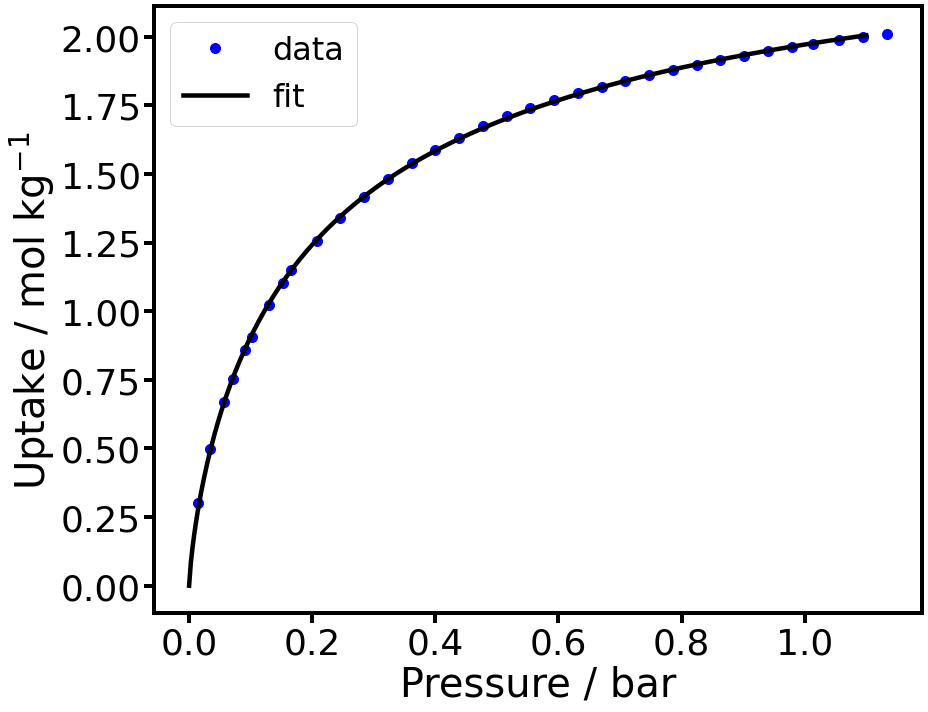

In [7]:
## reference = 298 K

fig=plt. figure(figsize =(13,10)) 
ax3=fig.add_subplot(1,1,1)

p_range = np.linspace(0,1.1,400)

plt.plot(df1["P"], df1["q"], lw=0, marker='o', markersize=10, color='blue', label='data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO_298K), lw=4.5, color='black', label='fit')

#plt. xlim(-0.05,51)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
plt. savefig("./fit_result_low_CO_298K.png",format='png')
plt.show()

In [8]:
K = parameter_low_CO_298K[0]
b = parameter_low_CO_298K[1]
n = parameter_low_CO_298K[2]

def LF_th_eq(P, s):
    q=K*b*(s*P)**n/(1+b*(s*P)**n)
    return q

pars, pcov = curve_fit(LF_th_eq, df0["P"], df0["q"], [50])

print(pars)
print(pcov)

parameter_low_CO_273K_th_fit = pars

[7.08932528]
[[0.12087524]]


In [9]:
K = parameter_low_CO_298K[0]
b = parameter_low_CO_298K[1]
n = parameter_low_CO_298K[2]

def LF_th_eq(P, s):
    q=K*b*(s*P)**n/(1+b*(s*P)**n)
    return q

pars, pcov = curve_fit(LF_th_eq, df2["P"], df2["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO_323K_th_fit = pars

[0.17750117]
[[2.12632625e-05]]


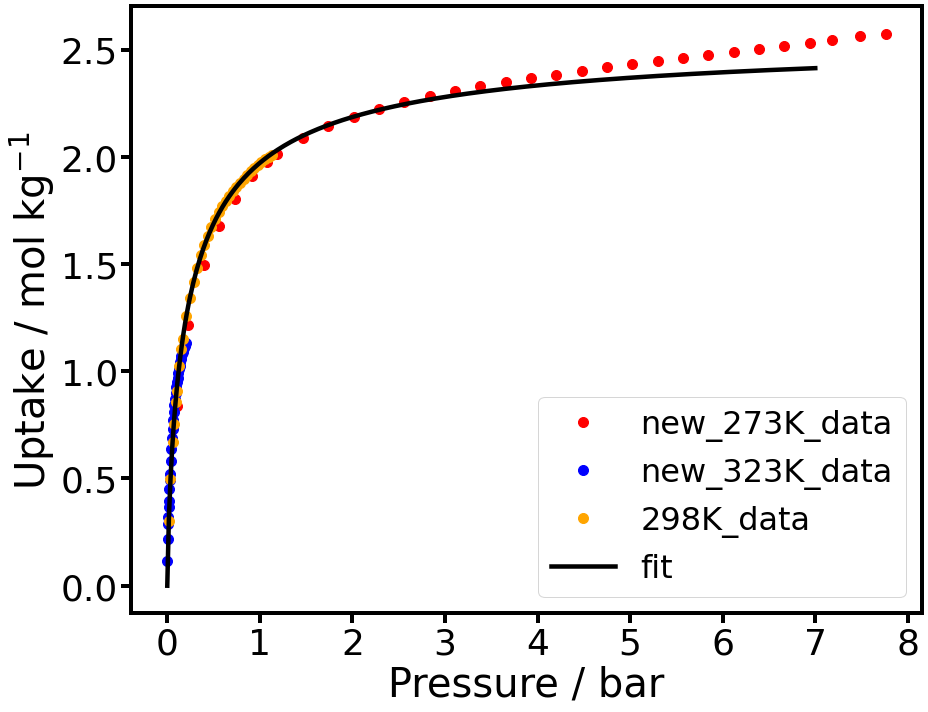

In [10]:
fig=plt. figure(figsize =(13,10)) 
ax6=fig.add_subplot(1,1,1)

p_range = np.linspace(0,7.0,400)

plt.plot(parameter_low_CO_273K_th_fit[0]*df0["P"], df0["q"], lw=0, marker='o', markersize=10, color='red', label='new_273K_data')
plt.plot(parameter_low_CO_323K_th_fit[0]*df2["P"], df2["q"], lw=0, marker='o', markersize=10, color='blue', label='new_323K_data')
#plt.plot(df0["P"], LF_th_eq(df0["P"], *parameter_high_CO_273K_th_fit), lw=4.5, color='red', label='fit2')
plt.plot(df1["P"], df1["q"], lw=0, marker='o', markersize=10, color='orange', label='298K_data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO_298K), lw=4.5, color='black', label='fit')

#plt. xlim(-0.05,3)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax6.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./fit_result_high_CO_273K.png",format='png')
plt.show()

In [11]:
df123 = pd.DataFrame({"P":df1["P"],
                     "q":df1["q"]})

df0_new = pd.DataFrame({"P":parameter_low_CO_273K_th_fit[0]*df0["P"],
                       "q": df0["q"]})

df2_new = pd.DataFrame({"P":parameter_low_CO_323K_th_fit[0]*df2["P"],
                       "q": df2["q"]})

df123_new = df123.append(df0_new, ignore_index = True)

df123_new_new = df123_new.append(df2_new, ignore_index = True)

df123_new_new

,P,q
0,0.014780,0.300423
1,0.034723,0.499727
2,0.057230,0.669014
3,0.071269,0.754571
4,0.090916,0.857466
...,...,...
95,0.173736,1.100639
96,0.179857,1.108197
97,0.187440,1.117151
98,0.194292,1.124030


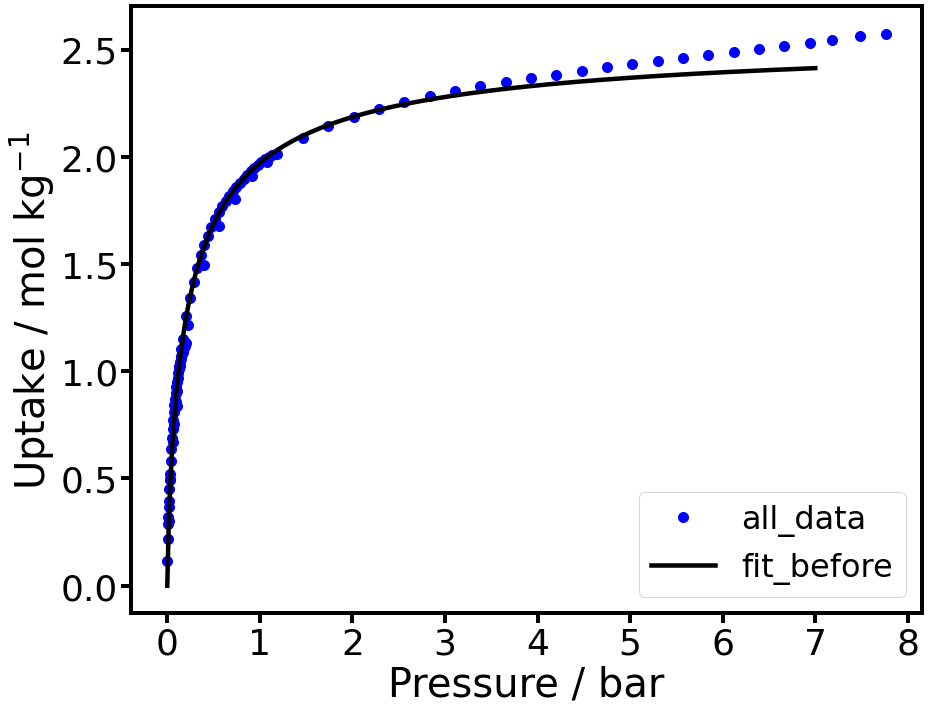

In [12]:
fig=plt. figure(figsize =(13,10)) 
ax16=fig.add_subplot(1,1,1)

p_range = np.linspace(0,7.0,400)

plt.plot(df123_new_new["P"], df123_new_new["q"], lw=0, marker='o', markersize=10, color='blue', label='all_data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO_298K), lw=4.5, color='black', label='fit_before')

#plt. xlim(-0.05,3)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax16.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./fit_result_high_CO_273K.png",format='png')
plt.show()

In [13]:
def LF_eq(P, K, b, n):
    q=K*b*P**n/(1+b*P**n)
    return q

pars, pcov = curve_fit(LF_eq, df123_new_new["P"], df123_new_new["q"], [1,1,1])

print(pars)
print(pcov)

parameter_low_CO_all_data = pars

[2.81211259 2.27404707 0.67392726]
[[ 4.36112606e-04 -1.32889883e-03 -1.65837415e-04]
 [-1.32889883e-03  4.37222287e-03  5.60692951e-04]
 [-1.65837415e-04  5.60692951e-04  8.39812809e-05]]


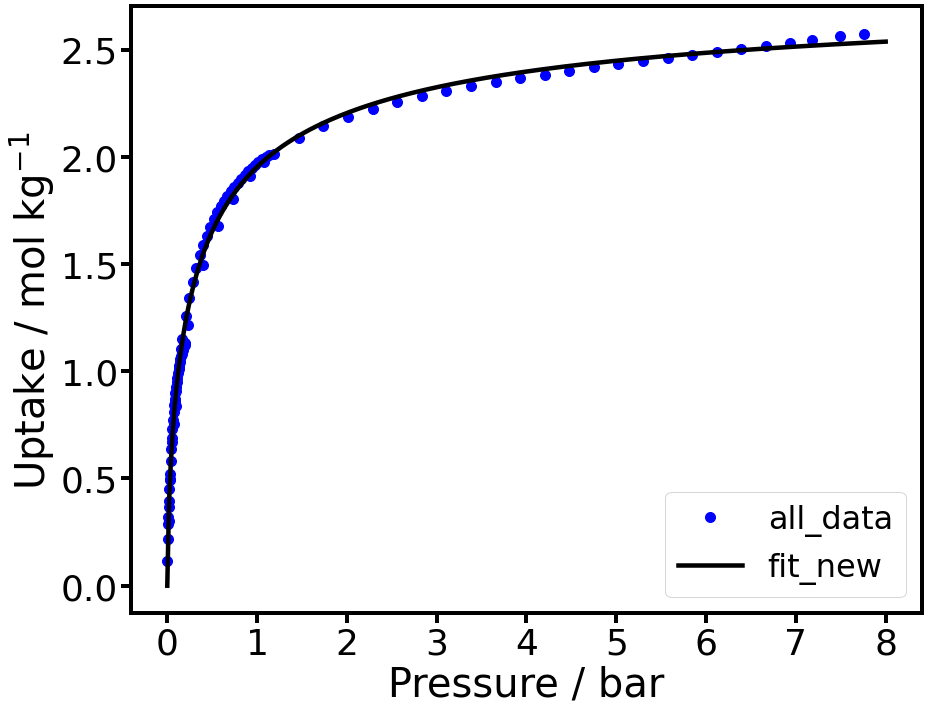

In [14]:
#reference = 298K

fig=plt. figure(figsize =(13,10)) 
ax17=fig.add_subplot(1,1,1)

p_range = np.linspace(0,8,400)

plt.plot(df123_new_new["P"], df123_new_new["q"], lw=0, marker='o', markersize=10, color='blue', label='all_data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO_all_data), lw=4.5, color='black', label='fit_new')

#plt. xlim(-0.05,1)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax17.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
plt. savefig("./fit_result_low_CO_all_data.png",format='png')
plt.show()

In [15]:
K_final = parameter_low_CO_all_data[0]
b_final = parameter_low_CO_all_data[1]
n_final = parameter_low_CO_all_data[2]

def LF_th_eq_final(P, s):
    q=K_final*b_final*(s*P)**n_final/(1+b_final*(s*P)**n_final)
    return q

pars, pcov = curve_fit(LF_th_eq_final, df0["P"], df0["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO_273K_th_fit_final = pars

[6.67595607]
[[0.00732458]]


In [16]:
K_final = parameter_low_CO_all_data[0]
b_final = parameter_low_CO_all_data[1]
n_final = parameter_low_CO_all_data[2]

def LF_th_eq_final(P, s):
    q=K_final*b_final*(s*P)**n_final/(1+b_final*(s*P)**n_final)
    return q

pars, pcov = curve_fit(LF_th_eq_final, df2["P"], df2["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO_323K_th_fit_final = pars

[0.17400426]
[[8.90430858e-06]]


In [17]:
def heat_eq(T, H):
    s=np.exp((H/8.3145)*(1/T-1/298))
    return s

pars, pcov = curve_fit(heat_eq, [273,298,323], [parameter_low_CO_273K_th_fit_final[0],1,parameter_low_CO_323K_th_fit_final[0]], [25000])

print(pars)
print(pcov)

parameter_low_CO_heat = pars

[51370.28406803]
[[5960.76617851]]


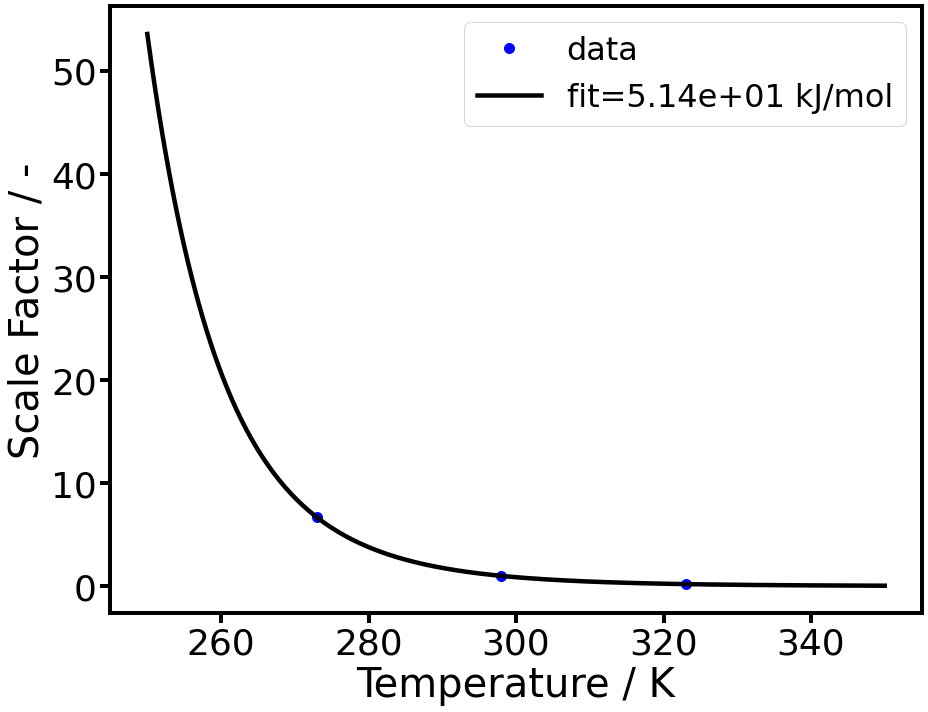

In [18]:
#reference = 298K

fig=plt. figure(figsize =(13,10)) 
ax18=fig.add_subplot(1,1,1)

T_range = np.linspace(250,350,400)

plt.plot([273,298,323], [parameter_low_CO_273K_th_fit_final[0],1,parameter_low_CO_323K_th_fit_final[0]], lw=0, marker='o', markersize=10, color='blue', label='data')
plt.plot(T_range, heat_eq(T_range, *parameter_low_CO_heat), lw=4.5, color='black', label='fit={0:.2e} kJ/mol'.format(parameter_low_CO_heat[0]/1000))

#plt. xlim(-0.05,1)
#plt. ylim(-0.5,10)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax18.spines[axis].set_linewidth(4)

plt.xlabel('Temperature / K', fontsize=40)
plt.ylabel('Scale Factor / -', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
plt. savefig("./fit_result_low_CO_heat.png",format='png')
plt.show()

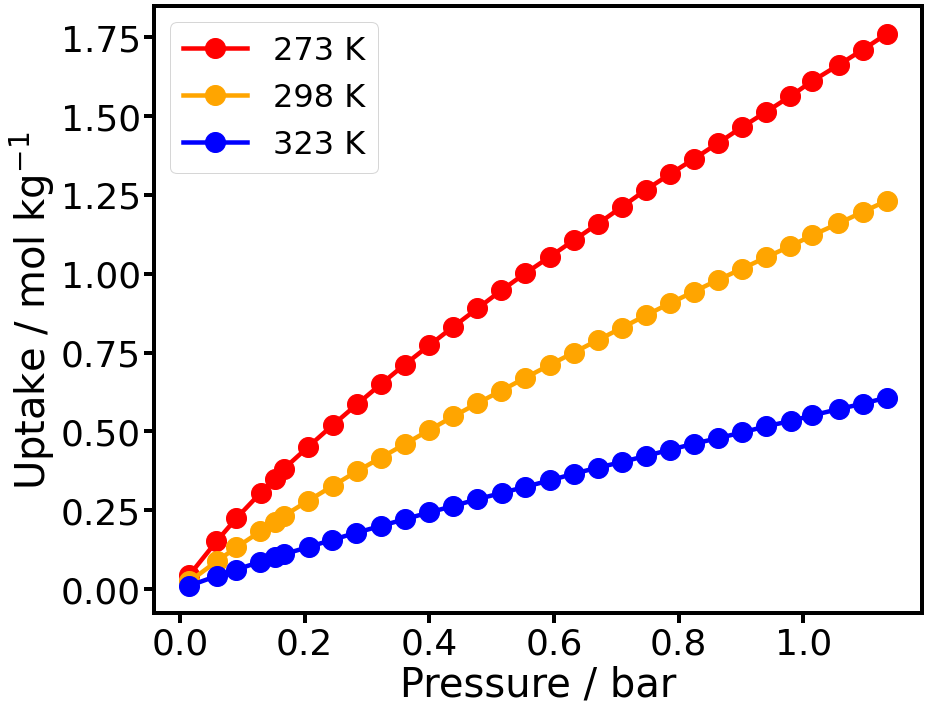

In [19]:
fig=plt. figure(figsize =(13,10)) 
ax1=fig.add_subplot(1,1,1)

plt.plot(df3["P"], df3["q"], lw=4.5, marker='o', markersize=20, color='red', label='273 K')
plt.plot(df4["P"], df4["q"], lw=4.5, marker='o', markersize=20, color='orange', label='298 K')
plt.plot(df5["P"], df5["q"], lw=4.5, marker='o', markersize=20, color='blue', label='323 K')

#plt. xlim(-0.05,51)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
plt. savefig("./isotherms_for_low_CO2.png",format='png')
plt.show()

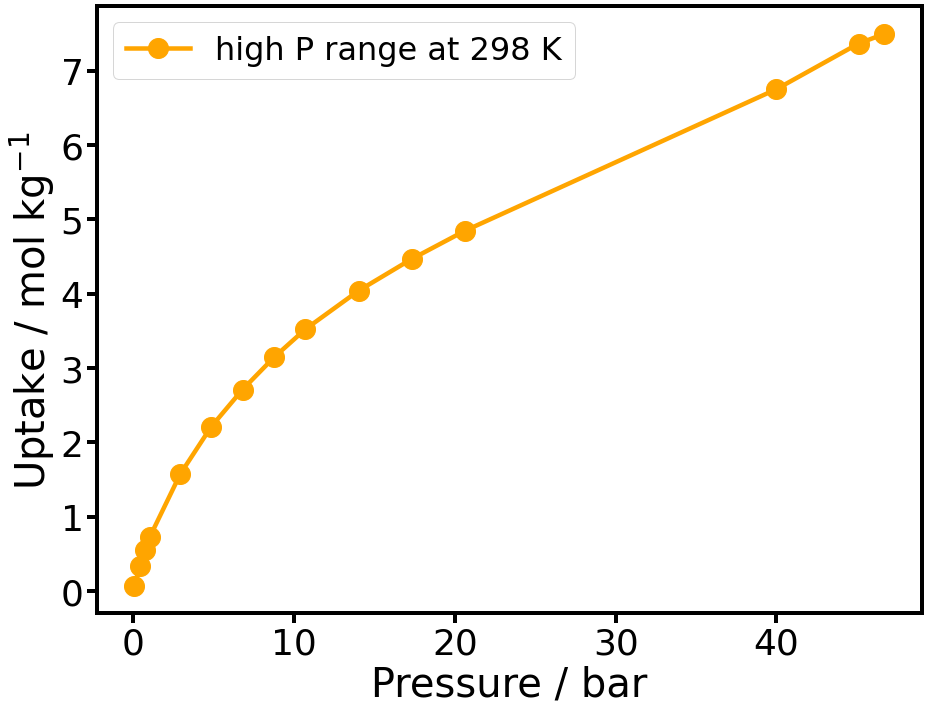

In [20]:
fig=plt. figure(figsize =(13,10)) 
ax100=fig.add_subplot(1,1,1)

#plt.plot(df4["P"], df4["q"], lw=4.5, marker='o', markersize=20, color='orange', label='low P range at 298 K')
plt.plot(df6["P"], df6["q"], lw=4.5, marker='o', markersize=20, color='orange', label='high P range at 298 K')

#plt. xlim(-0.05,1)
#plt. ylim(-0.05,1)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax100.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./isotherms_for_low_CO2.png",format='png')
plt.show()

In [21]:
def LF_eq(P, K, b, n):
    q=K*b*P**n/(1+b*P**n)
    return q

pars, pcov = curve_fit(LF_eq, df6["P"], df6["q"], [5,1,1])

print(pars)
print(pcov)

parameter_low_CO2_298K_high_P = pars

[20.8168194   0.03863392  0.6917306 ]
[[ 1.18356621e+01 -1.69982312e-02 -1.10171786e-01]
 [-1.69982312e-02  2.58504304e-05  1.47051036e-04]
 [-1.10171786e-01  1.47051036e-04  1.11795166e-03]]


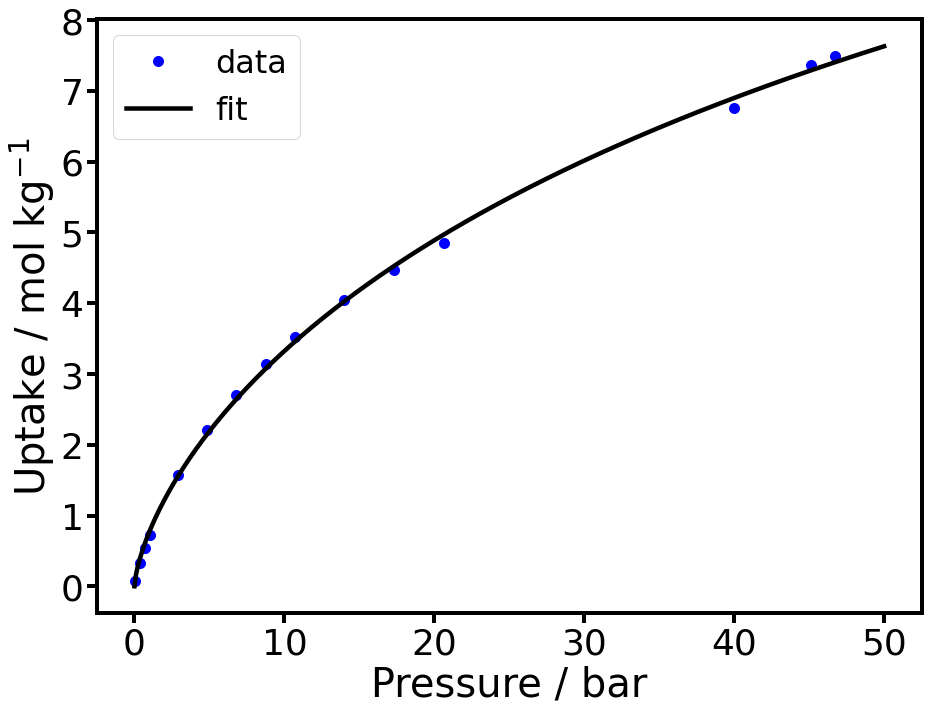

In [22]:
#reference = 298K

fig=plt. figure(figsize =(13,10)) 
ax200=fig.add_subplot(1,1,1)

p_range = np.linspace(0,50,500)

plt.plot(df6["P"], df6["q"], lw=0, marker='o', markersize=10, color='blue', label='data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO2_298K_high_P), lw=4.5, color='black', label='fit')

#plt. xlim(-0.05,51)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax200.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./fit_result_low_CO2_298K.png",format='png')
plt.show()

In [23]:
K = parameter_low_CO2_298K_high_P[0]
b = parameter_low_CO2_298K_high_P[1]
n = parameter_low_CO2_298K_high_P[2]

def LF_th_eq(P, s):
    q=K*b*(s*P)**n/(1+b*(s*P)**n)
    return q

pars, pcov = curve_fit(LF_th_eq, df3["P"], df3["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO2_273K_th_fit = pars

[2.82147415]
[[0.00215674]]


In [24]:
K = parameter_low_CO2_298K_high_P[0]
b = parameter_low_CO2_298K_high_P[1]
n = parameter_low_CO2_298K_high_P[2]

def LF_th_eq(P, s):
    q=K*b*(s*P)**n/(1+b*(s*P)**n)
    return q

pars, pcov = curve_fit(LF_th_eq, df5["P"], df5["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO2_323K_th_fit = pars

[0.54484761]
[[0.00014439]]


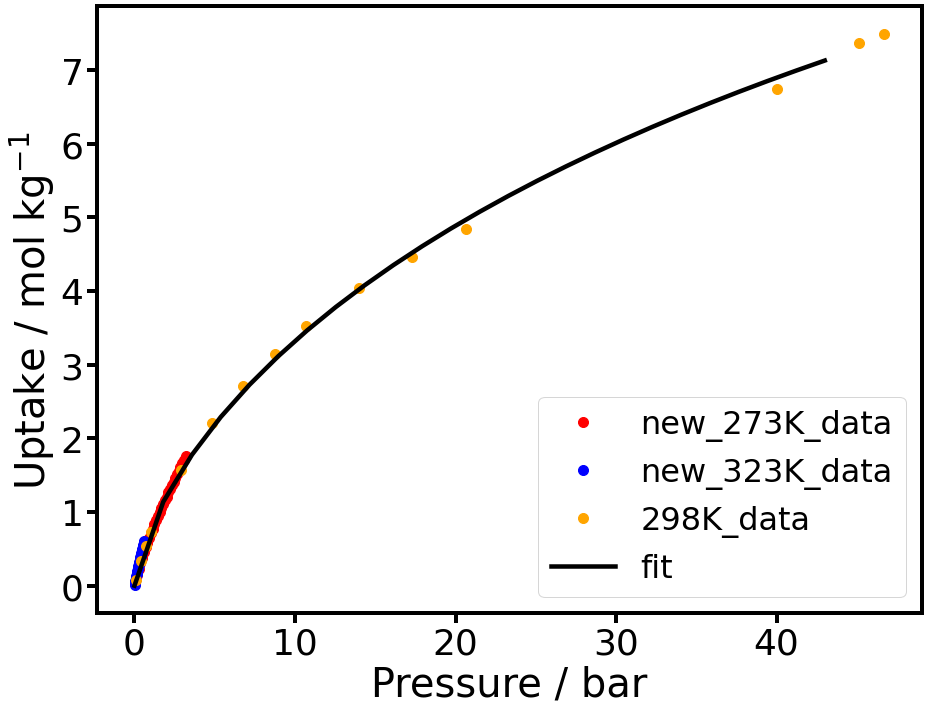

In [25]:
fig=plt. figure(figsize =(13,10)) 
ax11=fig.add_subplot(1,1,1)

p_range = np.linspace(0,43.0,25)

plt.plot(parameter_low_CO2_273K_th_fit[0]*df3["P"], df3["q"], lw=0, marker='o', markersize=10, color='red', label='new_273K_data')
plt.plot(parameter_low_CO2_323K_th_fit[0]*df5["P"], df5["q"], lw=0, marker='o', markersize=10, color='blue', label='new_323K_data')
#plt.plot(df0["P"], LF_th_eq(df0["P"], *parameter_high_CO_273K_th_fit), lw=4.5, color='red', label='fit2')
plt.plot(df6["P"], df6["q"], lw=0, marker='o', markersize=10, color='orange', label='298K_data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO2_298K_high_P), lw=4.5, color='black', label='fit')

#plt. xlim(-0.05,3)
#plt. ylim(-0.05,2)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./fit_result_high_CO_273K.png",format='png')
plt.show()

In [26]:
df789 = pd.DataFrame({"P":df6["P"],
                     "q":df6["q"]})

df3_new = pd.DataFrame({"P":parameter_low_CO2_273K_th_fit[0]*df3["P"],
                       "q": df3["q"]})

df5_new = pd.DataFrame({"P":parameter_low_CO2_323K_th_fit[0]*df5["P"],
                       "q": df5["q"]})

df789_new = df789.append(df3_new, ignore_index = True)

df789_new_new = df789_new.append(df5_new, ignore_index = True)

df789_new_new

,P,q
0,0.069069,0.070822
1,0.391830,0.331181
2,0.715360,0.544570
3,1.020500,0.725529
4,2.919700,1.573436
...,...,...
72,0.533552,0.532890
73,0.552165,0.550532
74,0.575552,0.570641
75,0.596529,0.587879


In [27]:
def LF_eq(P, K, b, n):
    q=K*b*P**n/(1+b*P**n)
    return q

pars, pcov = curve_fit(LF_eq, df789_new_new["P"], df789_new_new["q"], [1,1,1])

print(pars)
print(pcov)

parameter_low_CO2_all_data = pars

[18.25577235  0.04336364  0.71539862]
[[ 8.87761660e-01 -1.97978923e-03 -8.25282883e-03]
 [-1.97978923e-03  4.58918946e-06  1.71502875e-05]
 [-8.25282883e-03  1.71502875e-05  8.82084981e-05]]


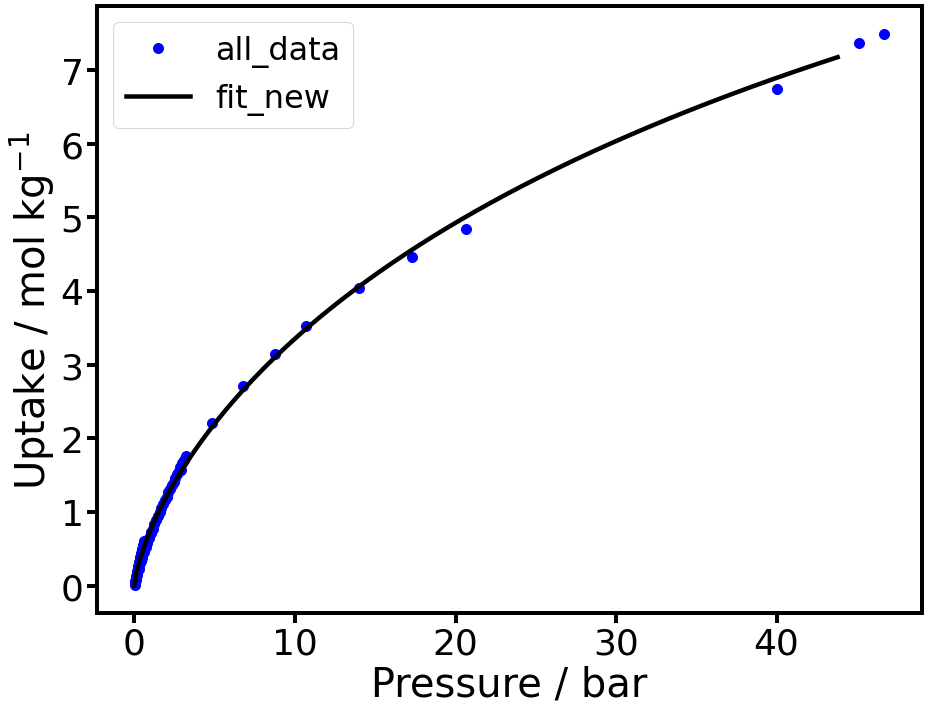

In [28]:
#reference = 298K

fig=plt. figure(figsize =(13,10)) 
ax13=fig.add_subplot(1,1,1)

p_range = np.linspace(0,43.8,400)

plt.plot(df789_new_new["P"], df789_new_new["q"], lw=0, marker='o', markersize=10, color='blue', label='all_data')
plt.plot(p_range, LF_eq(p_range, *parameter_low_CO2_all_data), lw=4.5, color='black', label='fit_new')

#plt. xlim(-0.05,1)
#plt. ylim(-0.05,82)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax13.spines[axis].set_linewidth(4)

plt.xlabel('Pressure / bar', fontsize=40)
plt.ylabel('Uptake / mol kg$^{{\u2212}1}$', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./fit_result_low_CO2_all_data.png",format='png')
plt.show()

In [29]:
K_final = parameter_low_CO2_all_data[0]
b_final = parameter_low_CO2_all_data[1]
n_final = parameter_low_CO2_all_data[2]

def LF_th_eq_final(P, s):
    q=K_final*b_final*(s*P)**n_final/(1+b_final*(s*P)**n_final)
    return q

pars, pcov = curve_fit(LF_th_eq_final, df3["P"], df3["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO2_273K_th_fit_final = pars

[2.85432885]
[[0.0015791]]


In [30]:
K_final = parameter_low_CO2_all_data[0]
b_final = parameter_low_CO2_all_data[1]
n_final = parameter_low_CO2_all_data[2]

def LF_th_eq_final(P, s):
    q=K_final*b_final*(s*P)**n_final/(1+b_final*(s*P)**n_final)
    return q

pars, pcov = curve_fit(LF_th_eq_final, df5["P"], df5["q"], [0.5])

print(pars)
print(pcov)

parameter_low_CO2_323K_th_fit_final = pars

[0.57679035]
[[0.0001191]]


In [31]:
def heat_eq(T, H):
    s=np.exp((H/8.3145)*(1/T-1/298))
    return s

pars, pcov = curve_fit(heat_eq, [273,298,323], [parameter_low_CO2_273K_th_fit_final[0],1,parameter_low_CO2_323K_th_fit_final[0]], [60000])

print(pars)
print(pcov)

parameter_low_CO2_heat = pars

[28187.29824215]
[[1199105.89404055]]


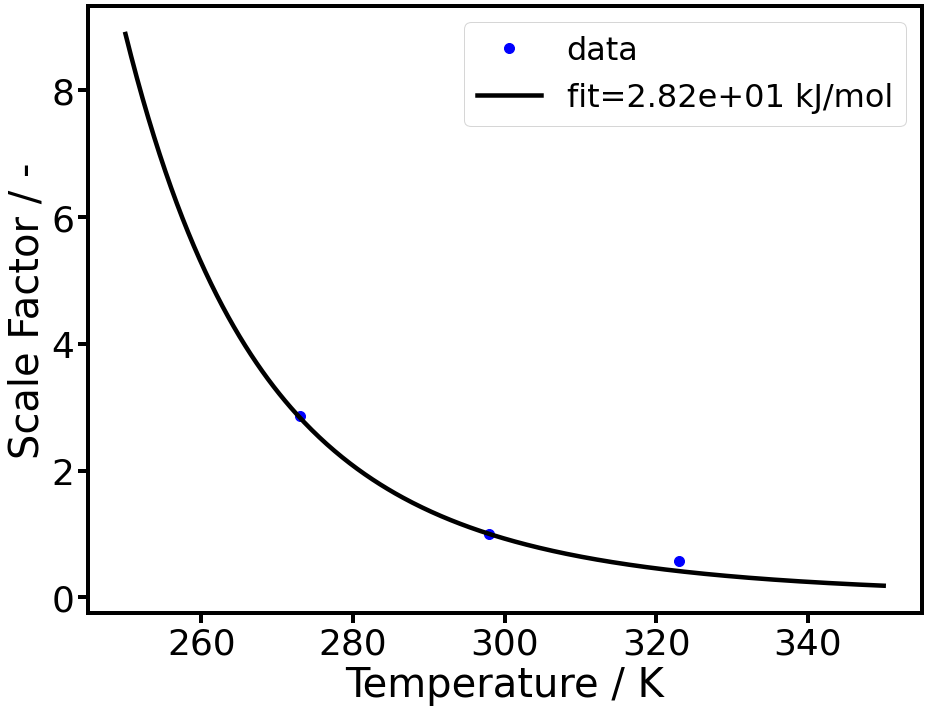

In [32]:
#reference = 298K

fig=plt. figure(figsize =(13,10)) 
ax14=fig.add_subplot(1,1,1)

T_range = np.linspace(250,350,400)

plt.plot([273,298,323], [parameter_low_CO2_273K_th_fit_final[0],1,parameter_low_CO2_323K_th_fit_final[0]], lw=0, marker='o', markersize=10, color='blue', label='data')
plt.plot(T_range, heat_eq(T_range, *parameter_low_CO2_heat), lw=4.5, color='black', label='fit={0:.2e} kJ/mol'.format(parameter_low_CO2_heat[0]/1000))

#plt. xlim(0,10)
#plt. ylim(0,10)
plt. xticks(fontsize=36)
plt. tick_params(axis='both', width=4, length=10)
plt. yticks(fontsize=36)
for axis in ['top','bottom','left','right']:
    ax14.spines[axis].set_linewidth(4)

plt.xlabel('Temperature / K', fontsize=40)
plt.ylabel('Scale Factor / -', fontsize=40)
plt.legend(frameon=True, loc = 'best',fontsize=32)
plt.tight_layout()
#plt. savefig("./fit_result_low_CO2_heat.png",format='png')
plt.show()

## Start process simulation

## test t_ad and t_bl sensitivity

In [33]:
N = 11
A_cros = 0.031416
L = 1
c1 = column(L,A_cros, n_component = 2,N_node = N)

## Adsorbent
isopar1 = parameter_low_CO_all_data
isopar2 = parameter_low_CO2_all_data

def iso_fn_LF(P,T):
    
    b1 = isopar1[1]*(P[0]*np.exp(parameter_low_CO_heat[0]/8.3145*(1/T-1/298)))**isopar1[2]
    b2 = isopar2[1]*(P[1]*np.exp(parameter_low_CO2_heat[0]/8.3145*(1/T-1/298)))**isopar2[2]
    denom = 1 + b1 + b2
    numor0 = isopar1[0]*b1
    numor1 = isopar2[0]*b2
    q_return = [numor0/denom, numor1/denom]
    return q_return

epsi_test = 0.4         # macroscopic void fraction (m^3/m^3)
D_particle_dia = 0.01   # particle diameter (m)
rho_s_test = 1100       # solid density (kg/mol)
c1.adsorbent_info(iso_fn_LF,epsi_test,D_particle_dia, rho_s_test)

M_m_test  = [0.028, 0.044]      ## molar mass    (kg/mol)
mu_test = [1.74E-5, 1.47E-5]    ## gas viscosity (Pa sec)
c1.gas_prop_info(M_m_test, mu_test)

## Mass transfer coefficients
D_dis_test = [1E-5, 1E-6]   # m^2/sec
k_MTC = [0.0004, 0.0008]    # m/sec
a_surf = 400                # m^2/m^3
c1.mass_trans_info(k_MTC, a_surf, D_dis_test)

## Thermal properties
Del_H = [parameter_low_CO_heat,parameter_low_CO2_heat]    # J/mol
#print(Del_H)
Cp_s = 935              # J/kg/K
Cp_g = [29.15, 37.22]   # J/mol/K
h_heat = 0.5           # J/sec/m^2/K
c1.thermal_info(Del_H,Cp_s,Cp_g,h_heat,)

In [36]:
## initial condition at first adsorption

P_init = 1*np.ones(N)                   # initial pressure (bar)
y_init = [0.9*np.ones(N), 0.1*np.ones(N)]   # initial composition (mol/mol)
T_init = 300*np.ones(N)                 # initial temperature (K)
q_init = iso_fn_LF([P_init*y_init[0],
P_init*y_init[1]],T_init)               # initial uptake
c1.initialC_info(P_init, T_init, T_init,y_init,q_init)

y_pre_ads = np.zeros(N*2*2+2*N)

tic = time.time()

for k in np.arange(30,1030,100):
    for j in np.arange(30,1030,100):
        for i in range(200):

            ##### adsorption ######
            Pin_ads_test = 3      # inlet pressure (bar)
            yin_ads_test = [0.55, 0.45]   # inlet composition (mol/mol)
            Tin_ads_test = 300      # inlet temperature (K)
            v_in_ads_test = 1
            Q_in_ads_test = v_in_ads_test*A_cros*epsi_test  # volumetric flowrate (m^3/sec)
            Cvin_ads_test = 1E-1    # inlet valve constant (m/sec/bar)

            Pout_ads_test = 2.5       # outlet pressure (bar)
            Cvout_ads_test = 2E-2   # outlet valve constant (m/sec/bar)
            c1.boundaryC_info(Pout_ads_test,Pin_ads_test,Tin_ads_test,yin_ads_test,
            Cvin_ads_test,Cvout_ads_test,Q_in_ads_test,False)

            yres_ads_test, zres_ads_tset, tres_ads_test = c1.run_mamoen(j, 10)

            c1_ads = c1.copy()

            C1_ads = c1_ads._y[:,0:N]

            Qin_ads, Qout_ads = c1.Q_valve()

            mass1_in_ads = C1_ads[:,0]*Qin_ads

            integ_mass1_in_ads = np.trapz(mass1_in_ads, x=tres_ads_test)

            c1.next_init(True)

            ##### Blowdown ######
            ## Boundary condition
            Pin_bl_test = 0      # inlet pressure (bar)
            yin_bl_test = [0.55, 0.45]   # inlet composition (mol/mol)
            Tin_bl_test = 300      # inlet temperature (K)
            Q_in_bl_test = 0  # volumetric flowrate (m^3/sec)
            Cvin_bl_test = 0    # inlet valve constant (m/sec/bar)

            Pout_bl_test = 0.5      # outlet pressure (bar)
            Cvout_bl_test = 2E-2   # outlet valve constant (m/sec/bar)
            c1.boundaryC_info(Pout_bl_test,Pin_bl_test,Tin_bl_test,yin_bl_test,
            Cvin_bl_test,Cvout_bl_test,Q_in_bl_test,False, foward_flow_direction =  False)

            yres_bl_test, zres_bl_test, tres_bl_test = c1.run_mamoen(k, 10)

            c1_bl = c1.copy()

            #### recovery & purity calculation ####

            C1_bl = c1_bl._y[:,0:N]
            C2_bl = c1_bl._y[:,1*N:2*N]
            q1_bl = c1_bl._y[:,2*N:3*N]
            q2_bl = c1_bl._y[:,3*N:4:N]
            Tg = c1_bl._y[:,4*N:5*N]
            Ts = c1_bl._y[:,5*N:6*N]

            Qin_bl, Qout_bl = c1.Q_valve()

            mass1_out_bl = C1_bl[:,-1]*Qin_bl
            mass2_out_bl = C2_bl[:,-1]*Qin_bl

            integ_mass1_out_bl = np.trapz(mass1_out_bl, x=tres_bl_test)
            integ_mass2_out_bl = np.trapz(mass2_out_bl, x=tres_bl_test)

            pr_bl = integ_mass1_out_bl/(integ_mass1_out_bl+integ_mass2_out_bl)

            rec_bl = integ_mass1_out_bl/integ_mass1_in_ads

            ###### Purge ######
            c1.next_init(True)
            ## Boundary condition
            Pin_pu_test = 1.5      # inlet pressure (bar)
            yin_pu_test = [0.55, 0.45]   # inlet composition (mol/mol)
            Tin_pu_test = 300      # inlet temperature (K)
            v_in_pu_test = 1
            Q_in_pu_test = v_in_pu_test*A_cros*epsi_test  # volumetric flowrate (m^3/sec)
            Cvin_pu_test = 1E-1    # inlet valve constant (m/sec/bar)

            Pout_pu_test = 1       # outlet pressure (bar)
            Cvout_pu_test = 2E-2   # outlet valve constant (m/sec/bar)
            c1.boundaryC_info(Pout_pu_test,Pin_pu_test,Tin_pu_test,yin_pu_test,
            Cvin_pu_test,Cvout_pu_test,Q_in_pu_test,False,foward_flow_direction =  False)

            yres_pu_test, zres_pu_test, tres_pu_test = c1.run_mamoen(j, 10)

            c1_pu = c1.copy()

            ###### Represurization ######
            c1.next_init(True)
            ## Boundary condition
            Pin_rp_test = 3      # inlet pressure (bar)
            yin_rp_test = [0.55, 0.45]   # inlet composition (mol/mol)
            Tin_rp_test = 300      # inlet temperature (K)
            v_in_rp_test = 1
            Q_in_rp_test = v_in_rp_test*A_cros*epsi_test  # volumetric flowrate (m^3/sec)
            Cvin_rp_test = 1E-1    # inlet valve constant (m/sec/bar)

            Pout_rp_test = 2.5       # outlet pressure (bar)
            Cvout_rp_test = 0   # outlet valve constant (m/sec/bar)
            c1.boundaryC_info(Pout_rp_test,Pin_rp_test,Tin_rp_test,yin_rp_test,
            Cvin_rp_test,Cvout_rp_test,Q_in_rp_test,False)

            yres_rp_test, zres_rp_test, tres_rp_test = c1.run_mamoen(k, 10)

            c1_rp = c1.copy()

            y_diff_test = np.mean(np.abs((yres_ads_test[-1,:] - y_pre_ads)/ y_pre_ads +1E-5))

            if y_diff_test < 1E-4:
                
                with open("tad_tbl_data.csv", "a") as out_file1:
                    out_file1.write(f"{j},{k},{pr_bl},{rec_bl}\n")
                
                break

            y_pre_ads = yres_ads_test[-1,:]

            c1.next_init(True)
            
toc = time.time() - tic

print(toc/60)

<ipython-input-36-95854410756c>:121: RuntimeWarning: divide by zero encountered in true_divide
  y_diff_test = np.mean(np.abs((yres_ads_test[-1,:] - y_pre_ads)/ y_pre_ads +1E-8))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-33-5cedce06138b>:13: RuntimeWarning: invalid value encountered in power
  b2 = isopar2[1]*(P[1]*np.exp(parameter_low_CO2_heat[0]/8.3145*(1/T-1/298)))**isopar2[2]
c:\Users\SebyG\Documents\GitHub\pyAPEP_v0_0_5\SH_YOON_P3\pyapep\simsep.py:29: RuntimeWarning: invalid value encountered in greater_equal
  ind_posi = B**2-4*A*C >= 0


ValueError: too many values to unpack (expected 3)

In [38]:
a = c1.run_mamoen(k, 10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-33-5cedce06138b>:13: RuntimeWarning: invalid value encountered in power
  b2 = isopar2[1]*(P[1]*np.exp(parameter_low_CO2_heat[0]/8.3145*(1/T-1/298)))**isopar2[2]
c:\Users\SebyG\Documents\GitHub\pyAPEP_v0_0_5\SH_YOON_P3\pyapep\simsep.py:29: RuntimeWarning: invalid value encountered in greater_equal
  ind_posi = B**2-4*A*C >= 0


In [48]:
print(k,j,i)

530 30 52


In [49]:
## initial condition at first adsorption

P_init = 1*np.ones(N)                   # initial pressure (bar)
y_init = [0.9*np.ones(N), 0.1*np.ones(N)]   # initial composition (mol/mol)
T_init = 300*np.ones(N)                 # initial temperature (K)
q_init = iso_fn_LF([P_init*y_init[0],
P_init*y_init[1]],T_init)               # initial uptake
c1.initialC_info(P_init, T_init, T_init,y_init,q_init)

y_pre_ads = np.zeros(N*2*2+2*N)

tic = time.time()

for i in range(200):

    ##### adsorption ######
    Pin_ads_test = 3      # inlet pressure (bar)
    yin_ads_test = [0.55, 0.45]   # inlet composition (mol/mol)
    Tin_ads_test = 300      # inlet temperature (K)
    v_in_ads_test = 1
    Q_in_ads_test = v_in_ads_test*A_cros*epsi_test  # volumetric flowrate (m^3/sec)
    Cvin_ads_test = 1E-1    # inlet valve constant (m/sec/bar)

    Pout_ads_test = 2.5       # outlet pressure (bar)
    Cvout_ads_test = 2E-2   # outlet valve constant (m/sec/bar)
    c1.boundaryC_info(Pout_ads_test,Pin_ads_test,Tin_ads_test,yin_ads_test,
    Cvin_ads_test,Cvout_ads_test,Q_in_ads_test,False)

    yres_ads_test, zres_ads_tset, tres_ads_test = c1.run_mamoen(j, 10)

    c1_ads = c1.copy()

    C1_ads = c1_ads._y[:,0:N]

    Qin_ads, Qout_ads = c1.Q_valve()

    mass1_in_ads = C1_ads[:,0]*Qin_ads

    integ_mass1_in_ads = np.trapz(mass1_in_ads, x=tres_ads_test)

    c1.next_init(True)

    ##### Blowdown ######
    ## Boundary condition
    Pin_bl_test = 0      # inlet pressure (bar)
    yin_bl_test = [0.55, 0.45]   # inlet composition (mol/mol)
    Tin_bl_test = 300      # inlet temperature (K)
    Q_in_bl_test = 0  # volumetric flowrate (m^3/sec)
    Cvin_bl_test = 0    # inlet valve constant (m/sec/bar)

    Pout_bl_test = 0.5      # outlet pressure (bar)
    Cvout_bl_test = 2E-2   # outlet valve constant (m/sec/bar)
    c1.boundaryC_info(Pout_bl_test,Pin_bl_test,Tin_bl_test,yin_bl_test,
    Cvin_bl_test,Cvout_bl_test,Q_in_bl_test,False, foward_flow_direction =  False)

    yres_bl_test, zres_bl_test, tres_bl_test = c1.run_mamoen(k, 10)

    c1_bl = c1.copy()

    #### recovery & purity calculation ####

    C1_bl = c1_bl._y[:,0:N]
    C2_bl = c1_bl._y[:,1*N:2*N]
    q1_bl = c1_bl._y[:,2*N:3*N]
    q2_bl = c1_bl._y[:,3*N:4:N]
    Tg = c1_bl._y[:,4*N:5*N]
    Ts = c1_bl._y[:,5*N:6*N]

    Qin_bl, Qout_bl = c1.Q_valve()

    mass1_out_bl = C1_bl[:,-1]*Qin_bl
    mass2_out_bl = C2_bl[:,-1]*Qin_bl

    integ_mass1_out_bl = np.trapz(mass1_out_bl, x=tres_bl_test)
    integ_mass2_out_bl = np.trapz(mass2_out_bl, x=tres_bl_test)

    pr_bl = integ_mass1_out_bl/(integ_mass1_out_bl+integ_mass2_out_bl)

    rec_bl = integ_mass1_out_bl/integ_mass1_in_ads

    ###### Purge ######
    c1.next_init(True)
    ## Boundary condition
    Pin_pu_test = 1.5      # inlet pressure (bar)
    yin_pu_test = [0.55, 0.45]   # inlet composition (mol/mol)
    Tin_pu_test = 300      # inlet temperature (K)
    v_in_pu_test = 1
    Q_in_pu_test = v_in_pu_test*A_cros*epsi_test  # volumetric flowrate (m^3/sec)
    Cvin_pu_test = 1E-1    # inlet valve constant (m/sec/bar)

    Pout_pu_test = 1       # outlet pressure (bar)
    Cvout_pu_test = 2E-2   # outlet valve constant (m/sec/bar)
    c1.boundaryC_info(Pout_pu_test,Pin_pu_test,Tin_pu_test,yin_pu_test,
    Cvin_pu_test,Cvout_pu_test,Q_in_pu_test,False,foward_flow_direction =  False)

    yres_pu_test, zres_pu_test, tres_pu_test = c1.run_mamoen(j, 10)

    c1_pu = c1.copy()

    ###### Represurization ######
    c1.next_init(True)
    ## Boundary condition
    Pin_rp_test = 3      # inlet pressure (bar)
    yin_rp_test = [0.55, 0.45]   # inlet composition (mol/mol)
    Tin_rp_test = 300      # inlet temperature (K)
    v_in_rp_test = 1
    Q_in_rp_test = v_in_rp_test*A_cros*epsi_test  # volumetric flowrate (m^3/sec)
    Cvin_rp_test = 1E-1    # inlet valve constant (m/sec/bar)

    Pout_rp_test = 2.5       # outlet pressure (bar)
    Cvout_rp_test = 0   # outlet valve constant (m/sec/bar)
    c1.boundaryC_info(Pout_rp_test,Pin_rp_test,Tin_rp_test,yin_rp_test,
    Cvin_rp_test,Cvout_rp_test,Q_in_rp_test,False)

    yres_rp_test, zres_rp_test, tres_rp_test = c1.run_mamoen(k, 10)

    c1_rp = c1.copy()

    y_diff_test = np.mean(np.abs((yres_ads_test[-1,:] - y_pre_ads)/ y_pre_ads +1E-5))

    if y_diff_test < 1E-4:
        
        with open("tad_tbl_data.csv", "a") as out_file1:
            out_file1.write(f"{j},{k},{pr_bl},{rec_bl}\n")
    
        break

    y_pre_ads = yres_ads_test[-1,:]

    c1.next_init(True)
        
toc = time.time() - tic

print(toc/60)

<ipython-input-49-8687e5602cef>:119: RuntimeWarning: divide by zero encountered in true_divide
  y_diff_test = np.mean(np.abs((yres_ads_test[-1,:] - y_pre_ads)/ y_pre_ads +1E-5))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-33-5cedce06138b>:13: RuntimeWarning: invalid value encountered in power
  b2 = isopar2[1]*(P[1]*np.exp(parameter_low_CO2_heat[0]/8.3145*(1/T-1/298)))**isopar2[2]
c:\Users\SebyG\Documents\GitHub\pyAPEP_v0_0_5\SH_YOON_P3\pyapep\simsep.py:29: RuntimeWarning: invalid value encountered in greater_equal
  ind_posi = B**2-4*A*C >= 0


ValueError: too many values to unpack (expected 3)

(<Figure size 630x450 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12496445eb0>)

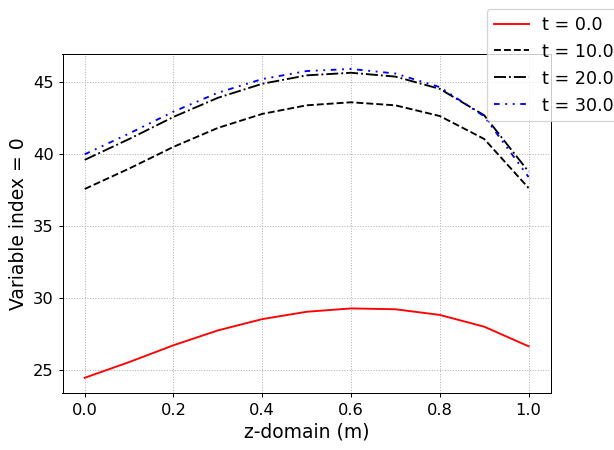

In [68]:
c1_pu.Graph(10, 0, loc = [1,1])

In [69]:
print(k,j)

530 30
